In [ ]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn imports
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### mount the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## read data

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Emory/HW4.xlsx')

# check dimension
print(data.shape)

data.head()

(2000, 25)


,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00


## Check and drop duplicates in any

In [ ]:
data.drop_duplicates()
print(data.shape)

(2000, 25)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sequence_number       2000 non-null   int64  
 1   US                    2000 non-null   int64  
 2   source_a              2000 non-null   int64  
 3   source_c              2000 non-null   int64  
 4   source_b              2000 non-null   int64  
 5   source_d              2000 non-null   int64  
 6   source_e              2000 non-null   int64  
 7   source_m              2000 non-null   int64  
 8   source_o              2000 non-null   int64  
 9   source_h              2000 non-null   int64  
 10  source_r              2000 non-null   int64  
 11  source_s              2000 non-null   int64  
 12  source_t              2000 non-null   int64  
 13  source_u              2000 non-null   int64  
 14  source_p              2000 non-null   int64  
 15  source_x             

### As we can see, no duplicates found in the data

 ### Check statistical summary of the data

In [ ]:
data.describe().iloc[1:]

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,0.500000,102.560745
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,0.500125,186.749816
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.500000,1.855000
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,1.000000,152.532500
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.000000,1500.060000


### Visualazing distribution of each feature

In [ ]:
# sns.pairplot(data,
#              height=2.5)
# plt.tight_layout()

# plt.show()

### Correlation Coefficients

<ipython-input-8-034820b6a9c8>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, annot=True, annot_kws={"size": 10}, mask=np.zeros_like(corr, dtype=np.bool),


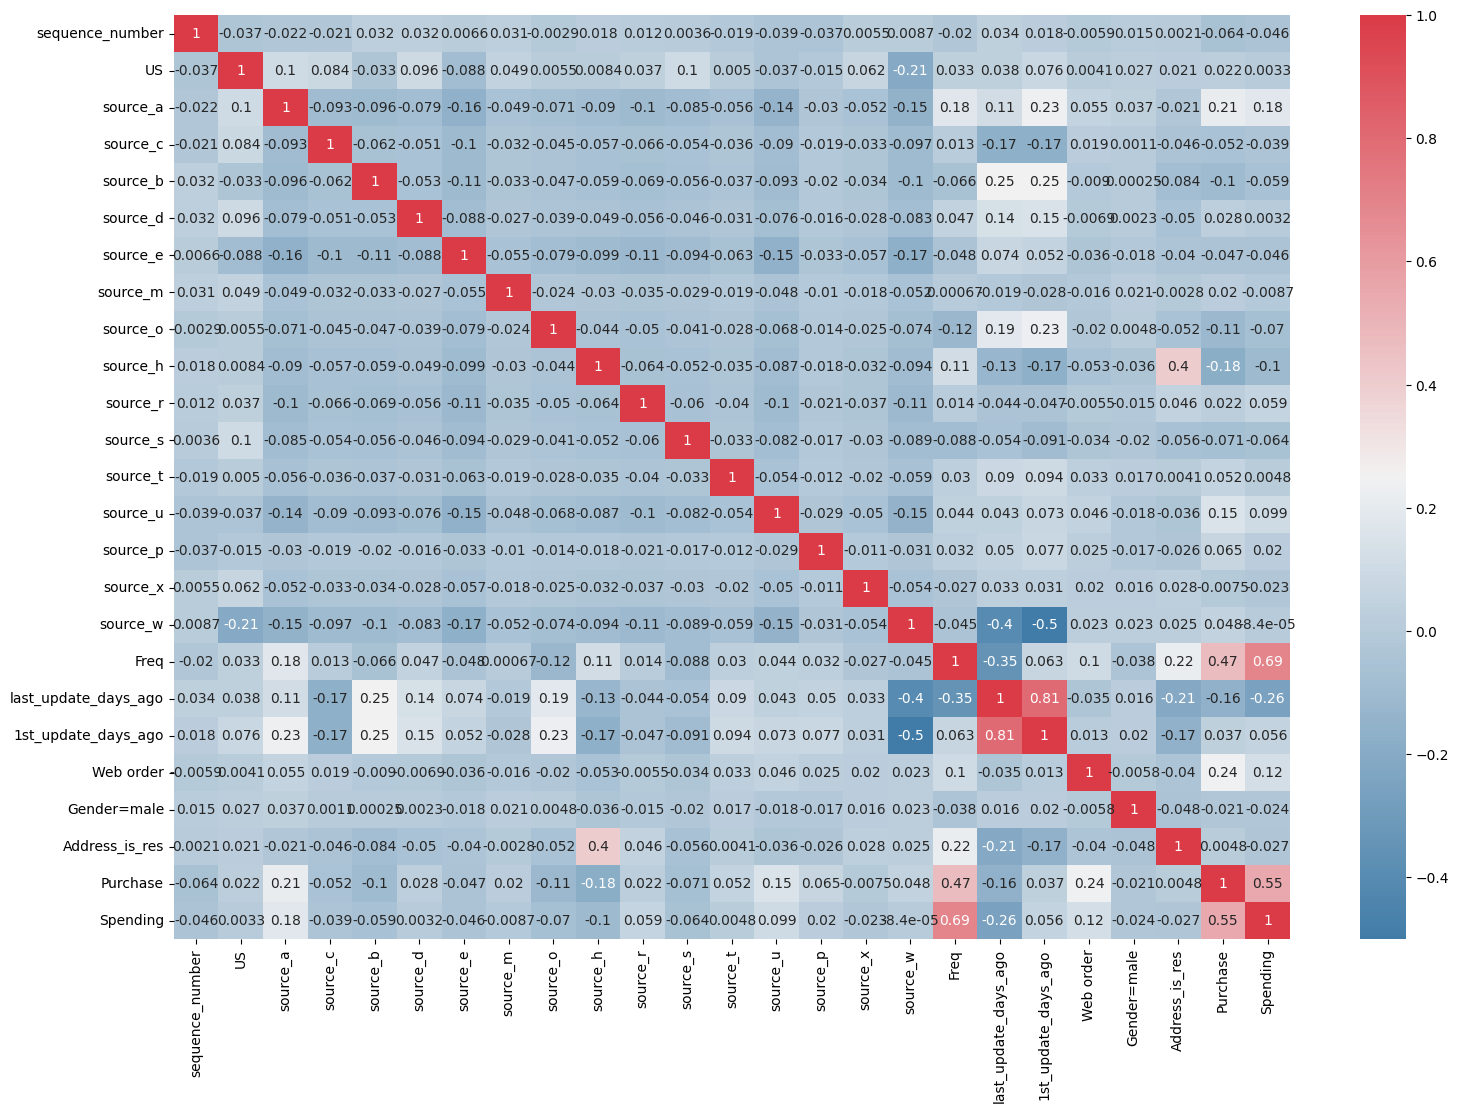

In [ ]:
f, ax = plt.subplots(figsize=(18, 12))
corr = data.corr()
sns.heatmap(corr, annot=True, annot_kws={"size": 10}, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(240, 10, as_cmap=True), ax=ax)


plt.show()

## Observations

1. Address_is_res and source_h have a very high positive correlation, suggesting customers with residential addresses are highly likely to be sourced from source_h.

2. Freq and Spending have a very high positive correlation, indicating that customers with a higher number of transactions in the last year are likely to have spent more in test mailing.

3. last_update_days_ago and 1st_update_days_ago are also highly positively correlated, suggesting that records that were created a long time ago tend to also have their last update a long time ago.

4. 1st_update_days_ago and source_w, and last_update_days_ago and source_w have a high negative correlation, meaning source_w is likely newer customers or those with more recent updates.

5. last_update_days_ago and Freq have a negative correlation, suggesting that more frequently transacting customers have more recent updates.

6. Address_is_res and Freq have a positive correlation, implying that the customers with residential addresses are likely to have a higher number of transactions.

7. Address_is_res and last_update_days_ago have a negative correlation, indicating that customers with residential addresses tend to have more recent updates.

8. US and source_w have a high negative correlation, suggesting that source_w likely contains non-US addresses.

9. source_a and Purchase, and source_a and Spending are positively correlated, indicating that individuals sourced from source_a are more likely to make purchases and spend more in test mailings.

Text(0.5, 1.0, 'boxplot')

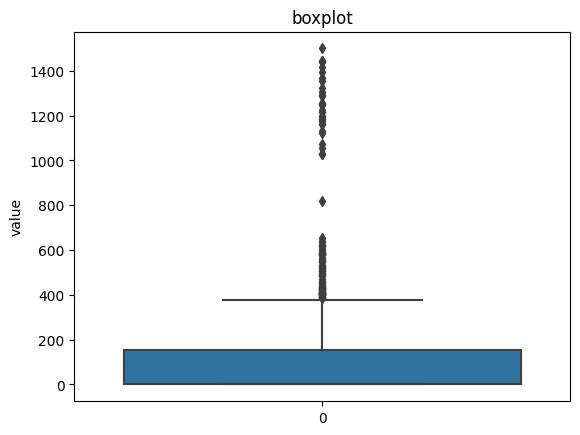

In [ ]:
target = data['Spending']
sns.boxplot(target)
plt.xlabel("")
plt.ylabel("value")
plt.title('boxplot')

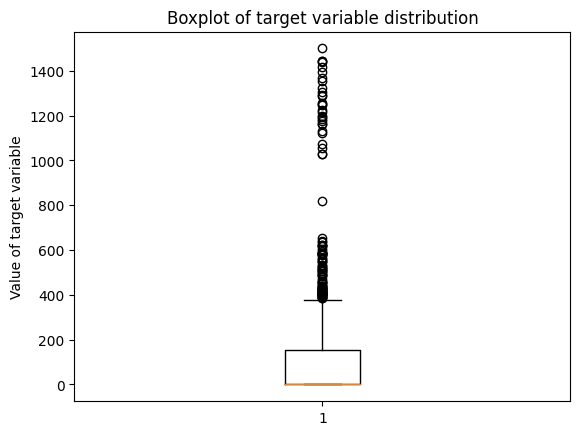

In [ ]:
plt.boxplot(target)
plt.ylabel("Value of target variable")
plt.title('Boxplot of target variable distribution')
plt.show()

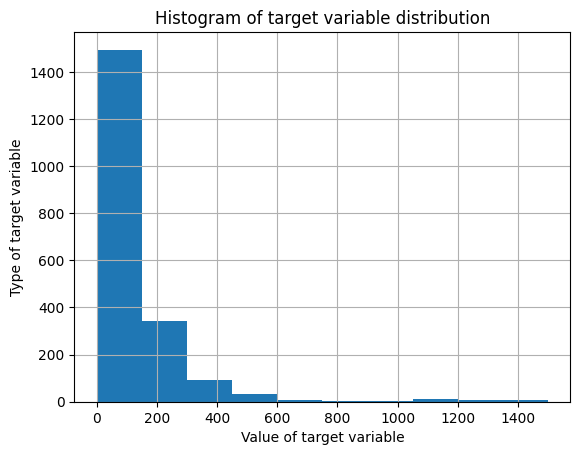

In [ ]:
target.hist()
plt.ylabel("Type of target variable")
plt.xlabel("Value of target variable")
plt.title('Histogram of target variable distribution')
plt.show()

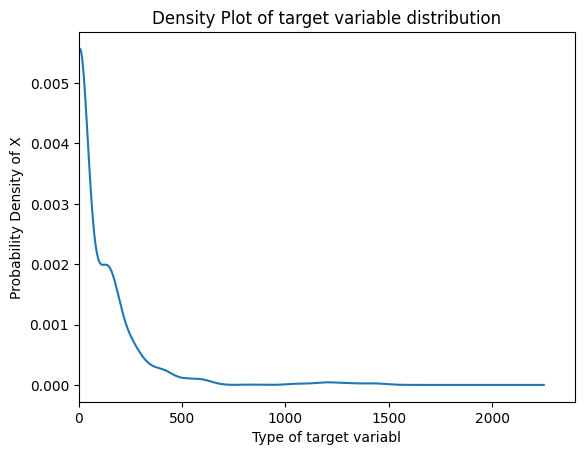

In [ ]:
target.plot(kind='density')
plt.xlabel("Type of target variabl")
plt.xlim(0,None)
plt.ylabel("Probability Density of X")
plt.title('Density Plot of target variable distribution')
plt.show()

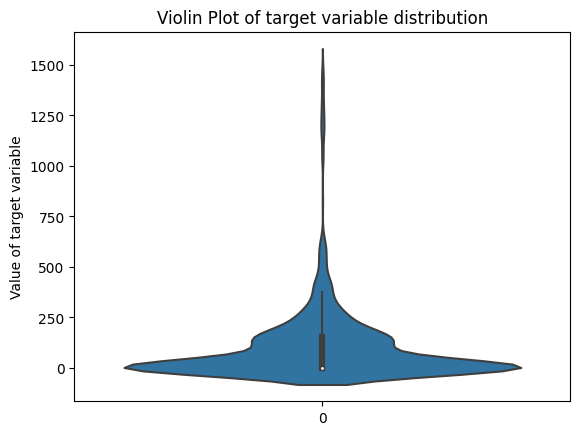

In [ ]:
sns.violinplot(target)
plt.ylabel("Value of target variable")
plt.title('Violin Plot of target variable distribution')
plt.show()

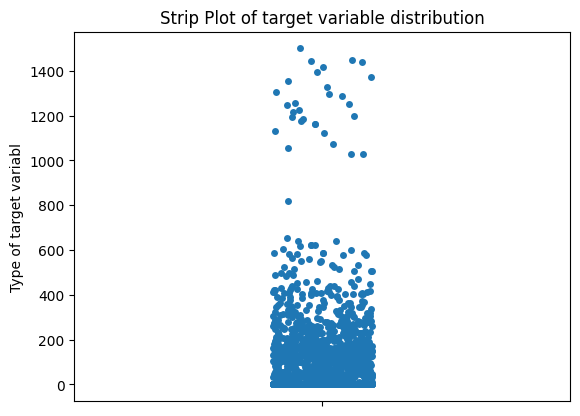

In [ ]:
sns.stripplot(target)
plt.ylabel("Type of target variabl")
plt.title('Strip Plot of target variable distribution')
plt.show()

## Split data

In [ ]:
X = data.drop(columns=['Spending'], axis=1)
y = data['Spending']

# Part a: Modeling

In [ ]:
# Define models

# Linear Regression
lr = LinearRegression()

# kNN Classifier
knn_reg = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsRegressor(n_neighbors=5))
      ])

# Decision tree
tree_reg = DecisionTreeRegressor(random_state=42)



######################## Define function to evaluate models #############################
def evaluate_model(model, X, y, cv=10, scoring='neg_mean_absolute_error'):
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    std = scores.std()
    return scores, std


# Evaluate models
lr_scores, lr_std = evaluate_model(lr, X, y)
knn_scores, knn_std = evaluate_model(knn_reg, X, y)
tree_scores, tree_std = evaluate_model(tree_reg, X, y)

# Print Results
# print("Linear Regression Mean Squared Error:", np.round(-np.mean(lr_scores),2))
# print("k-NN Regression Mean Squared Error:", np.round(-np.mean(knn_scores),2))
# print("Regression Tree Mean Squared Error:", np.round(-np.mean(tree_scores),2))



result_a = pd.DataFrame({
    'Model': ['Linear Regression','k-NN Regression','Regression Tree'],
    'MAE': [np.round(-np.mean(lr_scores),2),np.round(-np.mean(knn_scores),2),np.round(-np.mean(tree_scores),2)],
    'σ (sigma)': ['+/-'+str(round(lr_std,2)), '+/-'+str(round(knn_std,2)), '+/-'+str(round(tree_std,2))]
})

result_a

,Model,MAE,σ (sigma)
0,Linear Regression,70.50,+/-6.72
1,k-NN Regression,59.16,+/-9.18
2,Regression Tree,66.74,+/-10.69


# Part b: Feature Engineering

In [ ]:
# creating features based on exisitng ones ( Do the transformation on numeric columns)

def transform_col(df, cols, degree):
    """
    This functiom takes in list of colums and degree then it perform some transformations based on the passed degree.
    I limited the degree to 3 for simplicity but can be extended to any degree. Also it is worth noting that I am only transforming numeric features

    :param df: our dataframe we want to apply transformation to
    :param cols: list of columns from the dataframe to be used
    :param degree: degree of transformation

    :return dataframe
    """

    if degree not in [2,3]:
        raise ValueError("Degree must be 2 or 3")

    transformed_data = df.copy()
    for col in cols:
        if col not in df.columns:
            raise ValueError(f"{col} not found in given dataset")

        new_col_name = f"{col}_{degree}"
        transformed_data[new_col_name] = df[col] ** degree

    return transformed_data



In [ ]:
transformed_df = transform_col(df = data, cols = ['last_update_days_ago','1st_update_days_ago','Freq'], degree=2)
transformed_df = transform_col(df = transformed_df, cols = ['last_update_days_ago','1st_update_days_ago','Freq'], degree=3)
transformed_df['aveg_number_of_days'] = transformed_df['last_update_days_ago'] - transformed_df['1st_update_days_ago']

# transformed_df['Avg_Spending_Per_Freq'] = transformed_df.groupby('Freq')['Spending'].transform('mean') # I want to add this one but it may presents some data leakage as we are calculating on entire dataset


In [ ]:
transformed_df.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,Address_is_res,Purchase,Spending,last_update_days_ago_2,1st_update_days_ago_2,Freq_2,last_update_days_ago_3,1st_update_days_ago_3,Freq_3,aveg_number_of_days
0,1,1,0,0,1,0,0,0,0,0,...,1,1,127.87,13410244,13410244,4,49108313528,49108313528,8,0
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0.00,8410000,8410000,0,24389000000,24389000000,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,1,127.48,15077689,15319396,4,58546666387,59960115944,8,-31
3,4,1,0,1,0,0,0,0,0,0,...,0,0,0.00,687241,687241,1,569722789,569722789,1,0
4,5,1,0,1,0,0,0,0,0,0,...,0,0,0.00,755161,755161,1,656234909,656234909,1,0


In [ ]:
X_feature = transformed_df.drop(columns=['Spending'], axis=1)
y_feature = transformed_df['Spending']

In [ ]:
# Define models for feaure engineering

# Linear Regression
lr_feature = LinearRegression()

# kNN Classifier
knn_reg_feature = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsRegressor(n_neighbors=5))
      ])

# Decision tree
tree_reg_feature = DecisionTreeRegressor(random_state=42)



######################## Define function to evaluate models #############################
def evaluate_model(model, X, y, cv=10, scoring='neg_mean_absolute_error'):
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    std = scores.std()
    return scores, std


# Evaluate models
lr_scores_feat, lr_std_feat = evaluate_model(lr_feature, X_feature, y_feature)
knn_scores_feat, knn_std_feat = evaluate_model(knn_reg_feature, X_feature, y_feature)
tree_scores_feat, tree_std_feat = evaluate_model(tree_reg_feature, X_feature, y_feature)



print("Feature Engineering Model Results")

result_feature = pd.DataFrame({
    'Model': ['Linear Regression','k-NN Regression','Regression Tree'],
    'MAE': [np.round(-np.mean(lr_scores_feat),2),np.round(-np.mean(knn_scores_feat),2),np.round(-np.mean(tree_scores_feat),2)],
    'σ (sigma)': ['+/-'+str(round(lr_std_feat,2)), '+/-'+str(round(knn_std_feat,2)), '+/-'+str(round(tree_std_feat,2))]
})

result_feature

Feature Engineering Model Results


,Model,MAE,σ (sigma)
0,Linear Regression,57.00,+/-7.3
1,k-NN Regression,58.85,+/-8.76
2,Regression Tree,62.82,+/-10.66


## Part 3: Hyper parameter tuning [using vanilla features]




In [ ]:
# For Linear Regression: L1 (Lasso) and L2 (Ridge) regularization
lr_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
}

############################################################ LASSO ###############################################################
lr_grid_l1 = GridSearchCV(Lasso(random_state=42), lr_params, cv=10, scoring='neg_mean_absolute_error')

############################################################ RIDGE ##################################################################
lr_grid_l2 = GridSearchCV(Ridge(random_state=42), lr_params, cv=10, scoring='neg_mean_absolute_error')

lr_grid_l1.fit(X, y)
lr_grid_l2.fit(X, y)

########################################### For k-NN: number of neighbors and distance metric ############################################
knn_params = {
    'kneighborsregressor__n_neighbors': [1, 3, 5, 7, 9],  # Number of neighbors
    'kneighborsregressor__metric': ['euclidean', 'manhattan']  # Distance metric
}
knn_pipe = Pipeline([('scaler', StandardScaler()), ('kneighborsregressor', KNeighborsRegressor())])
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=10, scoring='neg_mean_absolute_error')

knn_grid.fit(X, y)

########################### For Regression Tree: tree depth and minimum samples split #######################################
tree_params = {
    'max_depth': [3, 5, 7, 9],  # Depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
}
tree_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_params, cv=10, scoring='neg_mean_absolute_error')

tree_grid.fit(X, y)

# Compile results into a DataFrame
results = pd.DataFrame({
    'Model': ['Linear Regression (L1)', 'Linear Regression (L2)', 'k-NN', 'Regression Tree'],
    'Best Parameters': [lr_grid_l1.best_params_, lr_grid_l2.best_params_, knn_grid.best_params_, tree_grid.best_params_],
    'MAE': [np.round(-lr_grid_l1.best_score_,2), np.round(-lr_grid_l2.best_score_,2), np.round(-knn_grid.best_score_,2), np.round(-tree_grid.best_score_,2)]
})

results

,Model,Best Parameters,MAE
0,Linear Regression (L1),{'alpha': 0.001},70.50
1,Linear Regression (L2),{'alpha': 10},70.42
2,k-NN,"{'kneighborsregressor__metric': 'euclidean', '...",58.69
3,Regression Tree,"{'max_depth': 5, 'min_samples_split': 10}",51.04


## Part 3: Hyper parameter tuning [using featured features]


In [ ]:
# For Linear Regression: L1 (Lasso) and L2 (Ridge) regularization
lr_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
}

############################################################ LASSO ###############################################################
lr_grid_l1 = GridSearchCV(Lasso(random_state=42), lr_params, cv=10, scoring='neg_mean_absolute_error')

############################################################ RIDGE ##################################################################
lr_grid_l2 = GridSearchCV(Ridge(random_state=42), lr_params, cv=10, scoring='neg_mean_absolute_error')

lr_grid_l1.fit(X_feature, y_feature)
lr_grid_l2.fit(X_feature, y_feature)

########################################### For k-NN: number of neighbors and distance metric ############################################
knn_params = {
    'kneighborsregressor__n_neighbors': [1, 3, 5, 7, 9],  # Number of neighbors
    'kneighborsregressor__metric': ['euclidean', 'manhattan']  # Distance metric
}
knn_pipe = Pipeline([('scaler', StandardScaler()), ('kneighborsregressor', KNeighborsRegressor())])
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=10, scoring='neg_mean_absolute_error')

knn_grid.fit(X_feature, y_feature)

########################### For Regression Tree: tree depth and minimum samples split #######################################
tree_params = {
    'max_depth': [3, 5, 7, 9],  # Depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
}
tree_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_params, cv=10, scoring='neg_mean_absolute_error')

tree_grid.fit(X_feature, y_feature)

# Compile results into a DataFrame
results_feature = pd.DataFrame({
    'Model': ['Linear Regression (L1)', 'Linear Regression (L2)', 'k-NN', 'Regression Tree'],
    'Best Parameters': [lr_grid_l1.best_params_, lr_grid_l2.best_params_, knn_grid.best_params_, tree_grid.best_params_],
    'MAE': [np.round(-lr_grid_l1.best_score_,2), np.round(-lr_grid_l2.best_score_,2), np.round(-knn_grid.best_score_,2), np.round(-tree_grid.best_score_,2)]
})

results_feature

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.171e+07, tolerance: 6.281e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.680e+06, tolerance: 5.884e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.143e+07, tolerance: 6.449e

,Model,Best Parameters,MAE
0,Linear Regression (L1),{'alpha': 1},55.21
1,Linear Regression (L2),{'alpha': 10},56.54
2,k-NN,"{'kneighborsregressor__metric': 'manhattan', '...",57.05
3,Regression Tree,"{'max_depth': 5, 'min_samples_split': 10}",51.43
